<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/Deep_Learning/3_ANN_MNIST(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
mnist = tf.keras.datasets.mnist
mnist

In [ ]:
#mnist.load_data() return the data with train-test-split
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

5


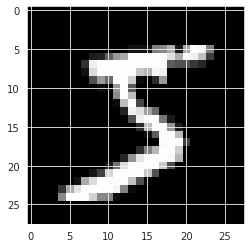

In [ ]:
print(y_train[0])
plt.imshow(x_train[0], cmap='gray')
plt.show()

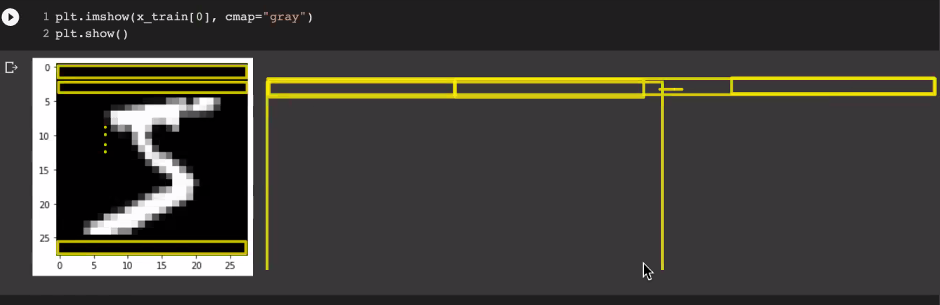

In [ ]:
#To scale 0-255 to 0-1 we divide by 255, so that data gets centered around 0 i.e mean now is approximately 0.
x_train, x_test = x_train/255.0, x_test/255.0

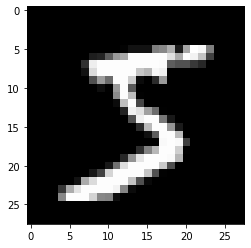

In [ ]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [ ]:
#Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),      #to make the data flatten
    tf.keras.layers.Dense(128, activation='relu'),     #hidden layer
    tf.keras.layers.Dropout(0.2),                      #20% dropout
    tf.keras.layers.Dense(10, activation='softmax'),   #10 as we have 10 outputs 0-9                         
])


In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#sparse_categorical_crossentropy is similar to one hot encoding

In [ ]:
#Training the model
r = model.fit(x_train, y_train, validation_data=[x_test, y_test], epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2981 - accuracy: 0.9120 - val_loss: 0.1514 - val_accuracy: 0.9527
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1476 - accuracy: 0.9561 - val_loss: 0.1003 - val_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1093 - accuracy: 0.9674 - val_loss: 0.0860 - val_accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0901 - accuracy: 0.9719 - val_loss: 0.0823 - val_accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0753 - accuracy: 0.9761 - val_loss: 0.0668 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0674 - accuracy: 0.9790 - val_loss: 0.0707 - val_accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0594 - accuracy: 0.9810 - val_loss: 0.0685 - val_accuracy:

Batch size:32, so len(x_train)/32 = 1875

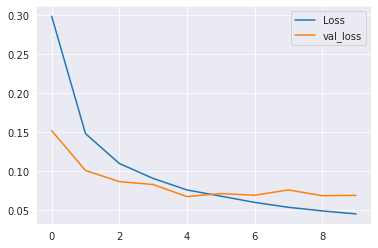

In [ ]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

We can still try for more epochs but also we can see we have received higher accuracy, so we can stop.

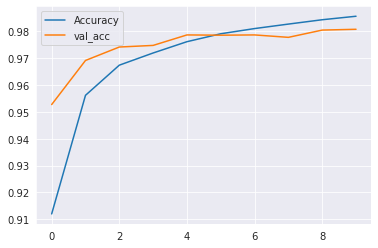

In [ ]:
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

**Observation:** Yes,  the accuracy is pretty high, almost between 97-98%

In [ ]:
#Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9807
[0.06840438395738602, 0.9807000160217285]
